In [60]:
import pandas as pd
from keras.callbacks import ReduceLROnPlateau


In [61]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content/drive/MyDrive/kaggle'

In [62]:
%cd '/content/drive/MyDrive/kaggle'

/content/drive/MyDrive/kaggle


In [63]:
!kaggle competitions download -c digit-recognizer


sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 100MB/s]
 55% 5.00M/9.16M [00:00<00:00, 29.2MB/s]
100% 9.16M/9.16M [00:00<00:00, 44.4MB/s]


In [64]:
!unzip \*.zip && rm *.zip 

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               

2 archives were successfully processed.


In [102]:
import tensorflow.keras as keras


# Load in our data from CSV files
train_df = pd.read_csv('/content/drive/My Drive/kaggle/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/kaggle/test.csv')
# Separate out our target values
y_train = train_df['label']
del train_df['label']


In [103]:
x_train = train_df.values
print(x_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


In [109]:
# Turn our scalar targets into binary categories
from keras.utils.np_utils import to_categorical 
y_train=to_categorical(y_train,num_classes=10)



In [114]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size=0.1,random_state=14)

In [117]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

In [118]:
x_train = x_train/255
x_test = x_test/255

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [121]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 50)         

In [122]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate =0.001,beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,loss="categorical_crossentropy", metrics=["accuracy"])

In [123]:

learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.6, 
                                            min_lr=0.00001)


In [124]:
batch_size = 64
epochs = 30

In [125]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( 
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        shear_range = 0.1,
        horizontal_flip=False,  
        vertical_flip=False
        )
train_datagen.fit(x_train)

In [126]:

history = model.fit(
            train_datagen.flow(x_train,y_train,batch_size = batch_size),
            validation_data = (x_test,y_test),
            batch_size = batch_size,
            steps_per_epoch = x_train.shape[0]//batch_size,
            epochs = epochs,
            verbose = 1,
            callbacks=[learning_rate_reduction])
            

Epoch 1/30
590/590 [==============================] - 118s 200ms/step - loss: 0.0865 - accuracy: 0.9730 - val_loss: 0.0637 - val_accuracy: 0.9774
Epoch 3/30
590/590 [==============================] - 118s 199ms/step - loss: 0.0687 - accuracy: 0.9790 - val_loss: 0.0447 - val_accuracy: 0.9845
Epoch 4/30
590/590 [==============================] - 117s 199ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0581 - val_accuracy: 0.9805
Epoch 5/30
590/590 [==============================] - 118s 200ms/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 0.0611 - val_accuracy: 0.9829
Epoch 6/30
590/590 [==============================] - 118s 200ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.0458 - val_accuracy: 0.9874
Epoch 7/30
590/590 [==============================] - 118s 200ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0384 - val_accuracy: 0.9886
Epoch 8/30
590/590 [==============================] - 117s 199ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0354 -

In [127]:
model.evaluate(x_test,y_test)

132/132 [==============================] - 3s 20ms/step - loss: 0.0374 - accuracy: 0.9905


[0.037438686937093735, 0.9904761910438538]

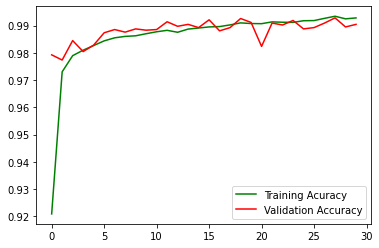

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

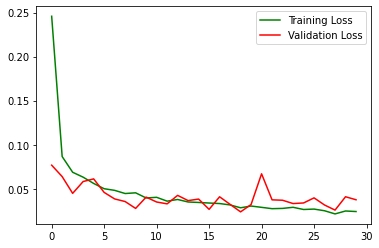

In [130]:
plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [132]:
data = test_df.values
data = data.reshape([28000,28,28,1])
print(data.shape)
data = data/255

(28000, 28, 28, 1)


In [134]:
import numpy as np
test_pred = model.predict(data)
test_pred = np.argmax(test_pred,axis=1)
print(test_pred.shape)

(28000,)


In [135]:
sample_submission = pd.read_csv('/content/drive/My Drive/kaggle/sample_submission.csv')
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [136]:
index=sample_submission.ImageId
data= {'ImageId':index, 'Label':test_pred}
df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of        ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]>

In [138]:
df.to_csv('digitrec.csv',index=False)